In [1]:
library(sitePath)
library(ggplot2)
suppressPackageStartupMessages(library(ggtree))

METADATA_DIR <- "Metadata"
REFSEQ_DIR <- "RefSeq"
OUTPUT_DIR <- "Output"

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 



In [2]:
metadata <- read.csv(file.path(METADATA_DIR, "SARS_CoV_2.csv"), row.names = 1)

In [3]:
siteMapping <- read.csv(file.path(REFSEQ_DIR, "SARS_CoV_2.csv"), row.names = 1)

In [4]:
minEntropy <- readRDS("SARS-CoV-2.rds")
paths <- attr(minEntropy, "paths")

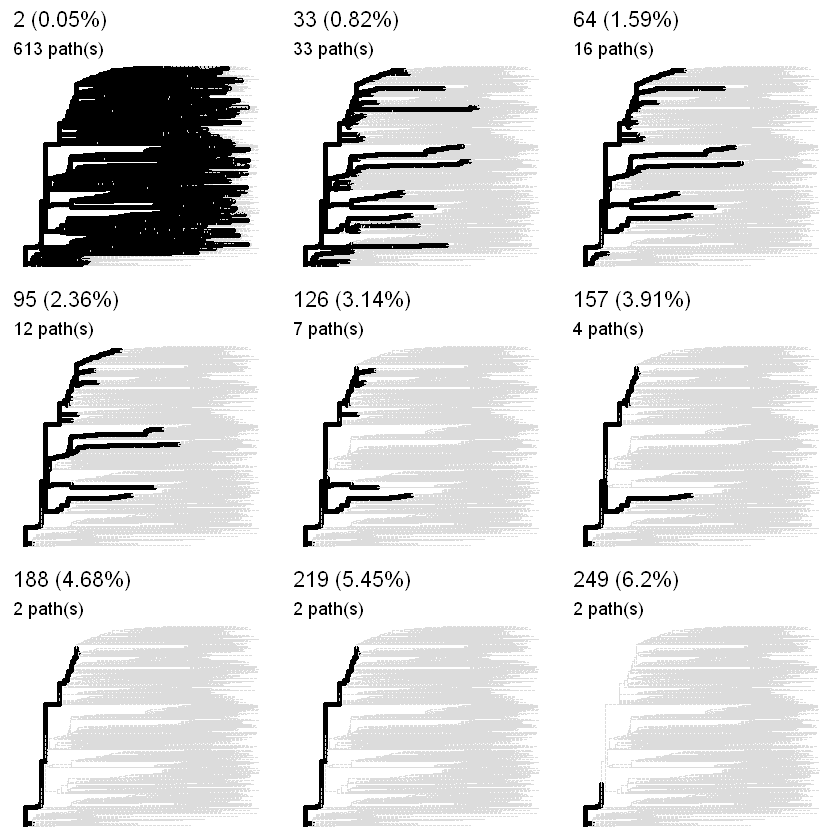

In [7]:
sp <- sneakPeek(paths)

In [8]:
fixedSites <- fixationSites(minEntropy)
attr(fixedSites, "clustersByPath") <- sitePath:::.assignClusterNames(attr(fixedSites, "clustersByPath"))

Warning message:
"`mutate_()` is deprecated as of dplyr 0.7.0.
Please use `mutate()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


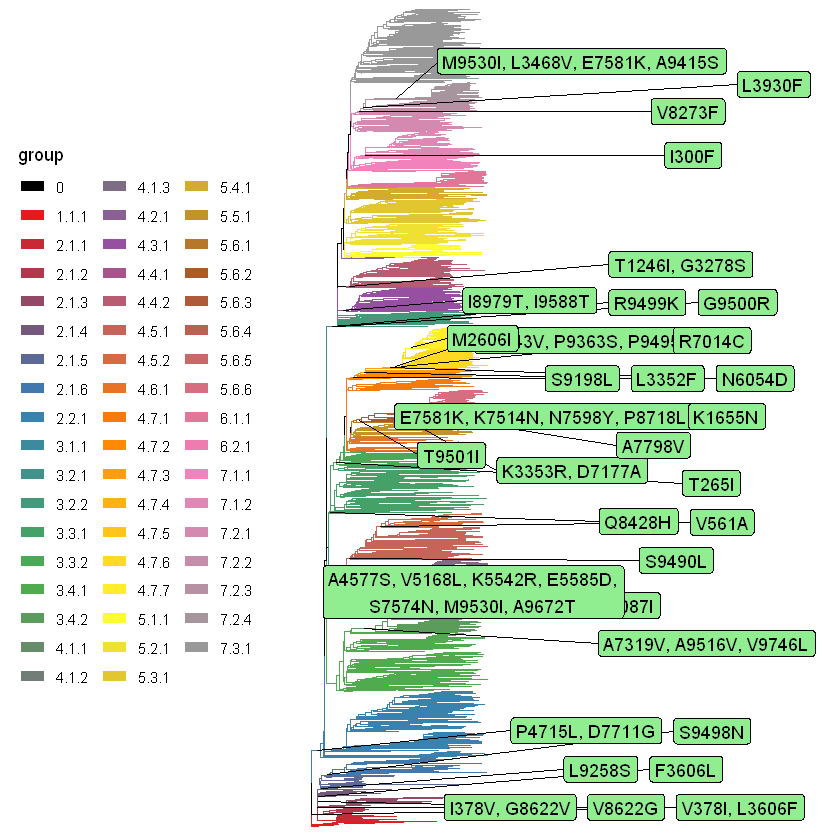

In [9]:
plot(fixedSites, max.overlaps = Inf, nudge_x = 2) + ggplot2::xlim(0, 3)

In [12]:
fixedSites

This is a 'fixationSites' object.

Result for 16 paths:

378 3606 8622 9258 9498 3087 4577 4715 5168 5542 5585 7574 7711 8428 9530 9672 9499 9500 8979 9588 1246 3278 561 9490 300 3468 3930 7581 8273 9415 265 7319 9516 9746 1655 3353 7177 7514 7598 7798 8718 9501 2606 3352 6054 7014 8543 9198 9363 9495 
No reference sequence specified. Using alignment numbering

In [18]:
paraSites <- parallelSites(minEntropy)

Warning message:
"`filter_()` is deprecated as of dplyr 0.7.0.
Please use `filter()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


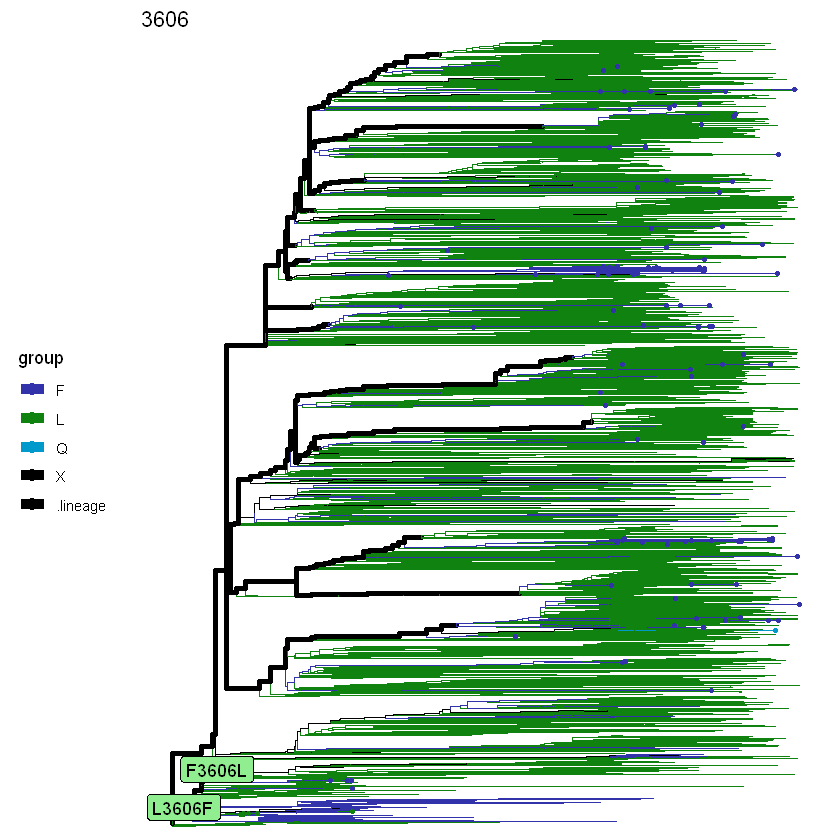

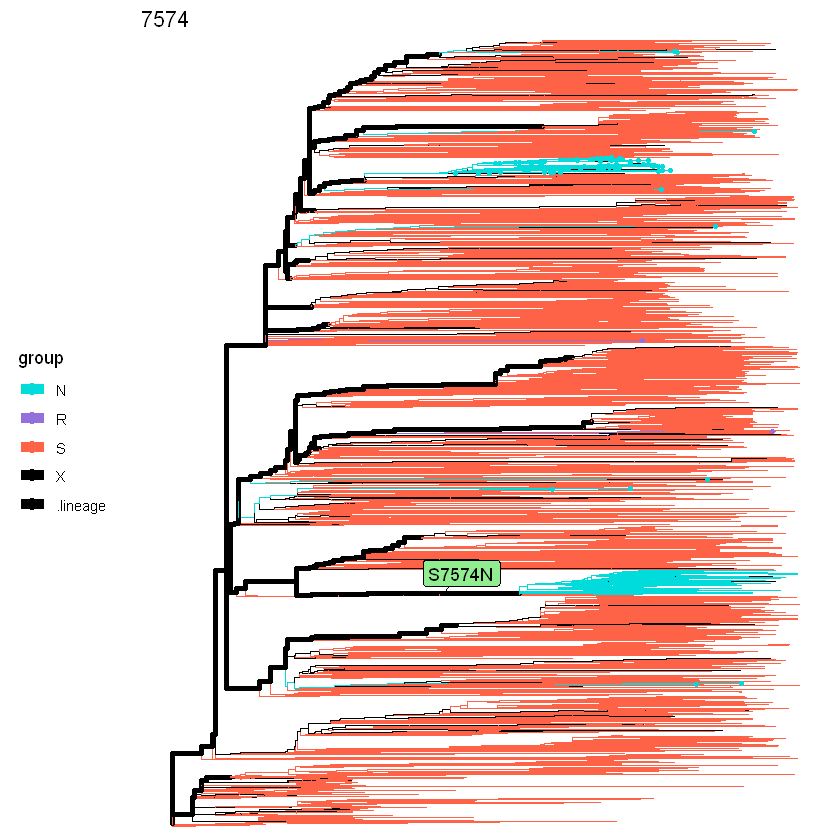

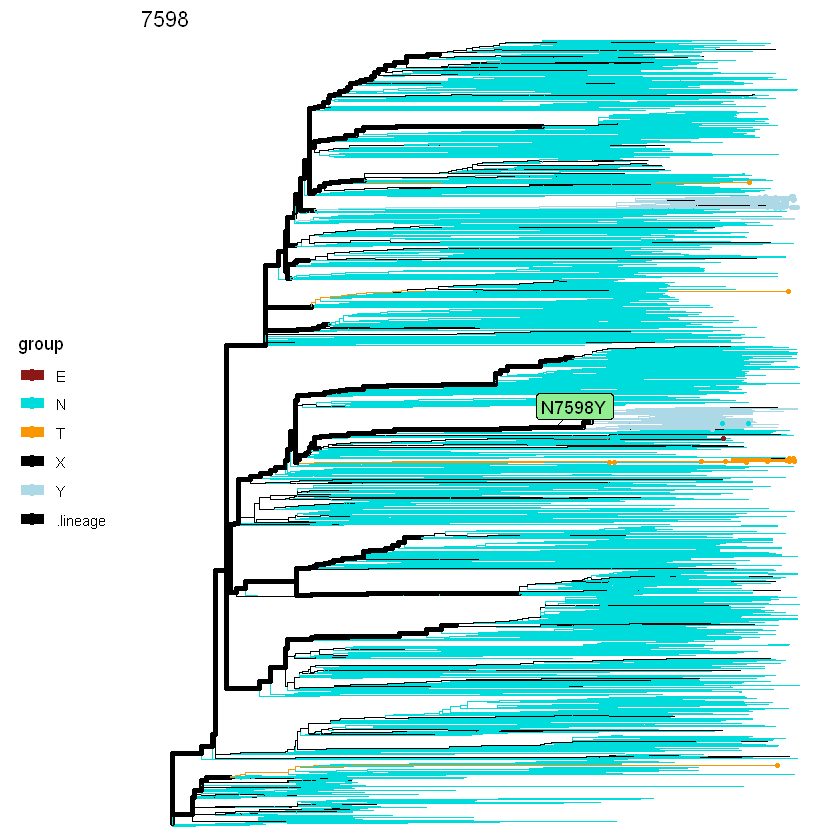

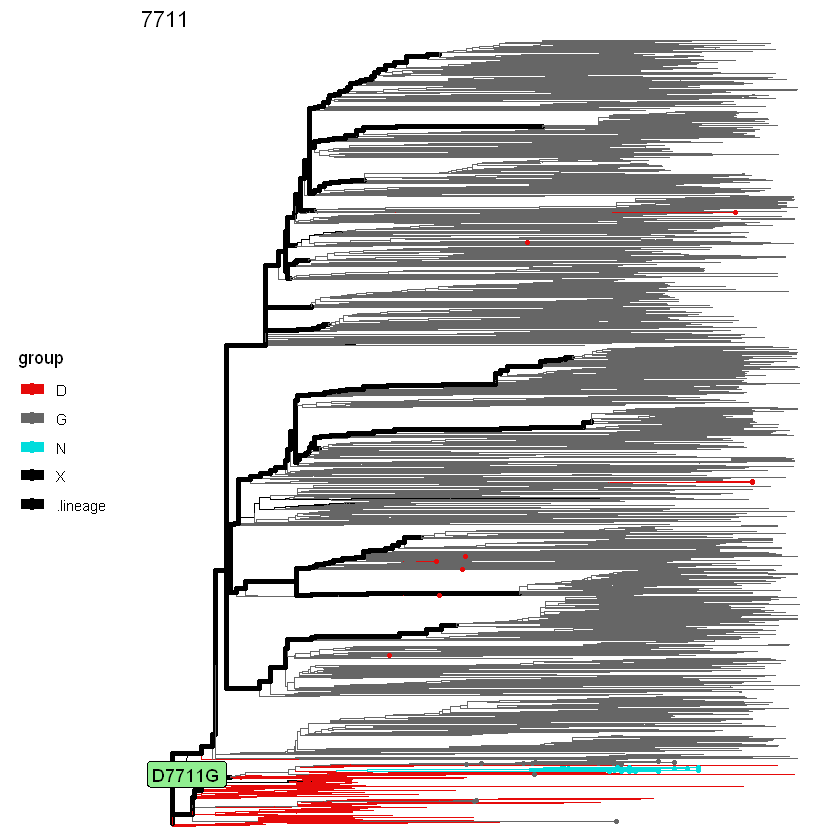

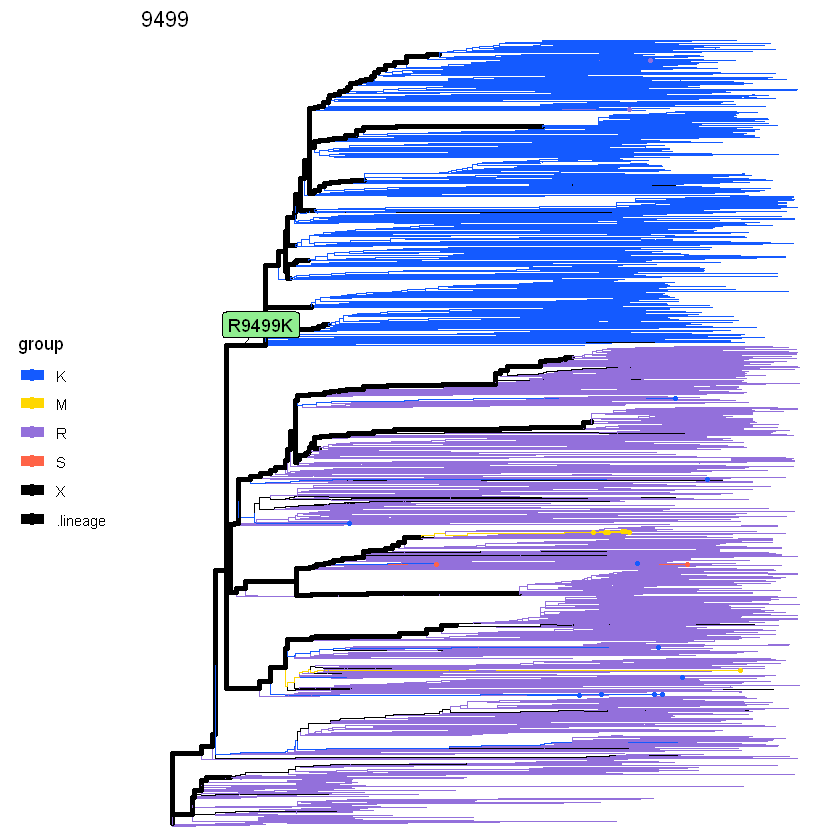

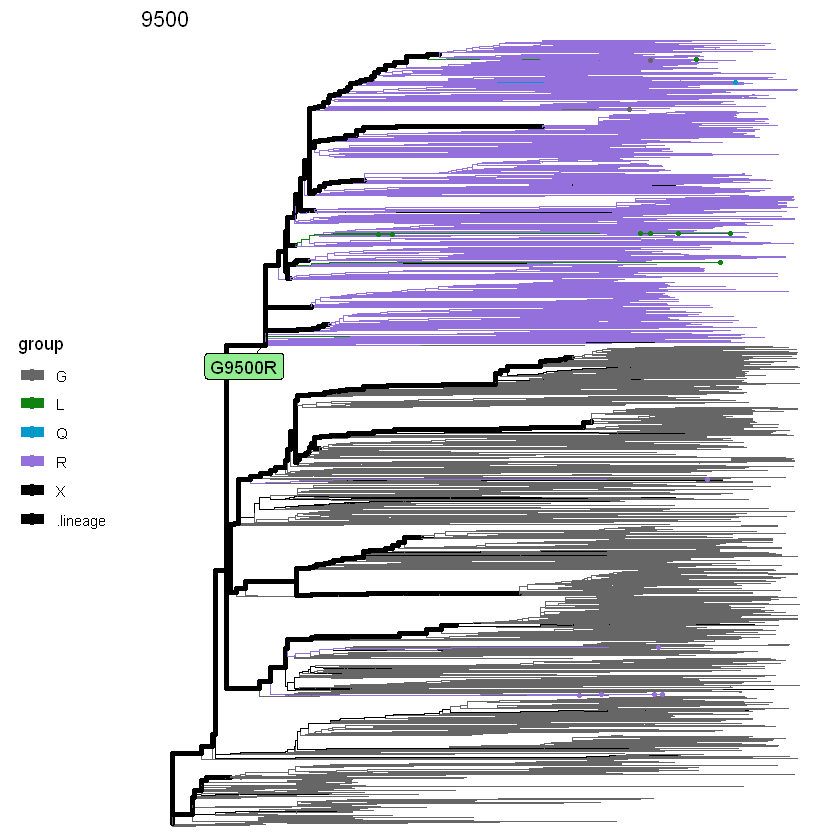

In [19]:
for (site in c(3606,7574,7598,7711,9499,9500)) {
    print(plotSingleSite(paraSites, site))
}

In [39]:
metadata[metadata[["Nextstrain_clade"]] == "20A.EU2", "Nextstrain_clade"] <- "20A"

tree <- as.phylo(fixedSites)
grp <- split(row.names(metadata), metadata[["Nextstrain_clade"]])

p <- ggtree(groupOTU(tree, grp), aes(color = group)) +
    scale_color_manual(values = c(
        "black",
        "#4F34D2",
        "#4664EB",
        "#4F91E5",
        "#60B2CA",
        "#78C7A4",
        "#95D37F",
        "#B8D763",
        "#DBD350",
        "#F6C445",
        "#FFA43D",
        "#FF7033",
        "#F93529"
    )) +
    guides(color = guide_legend(override.aes = list(size = 3)))

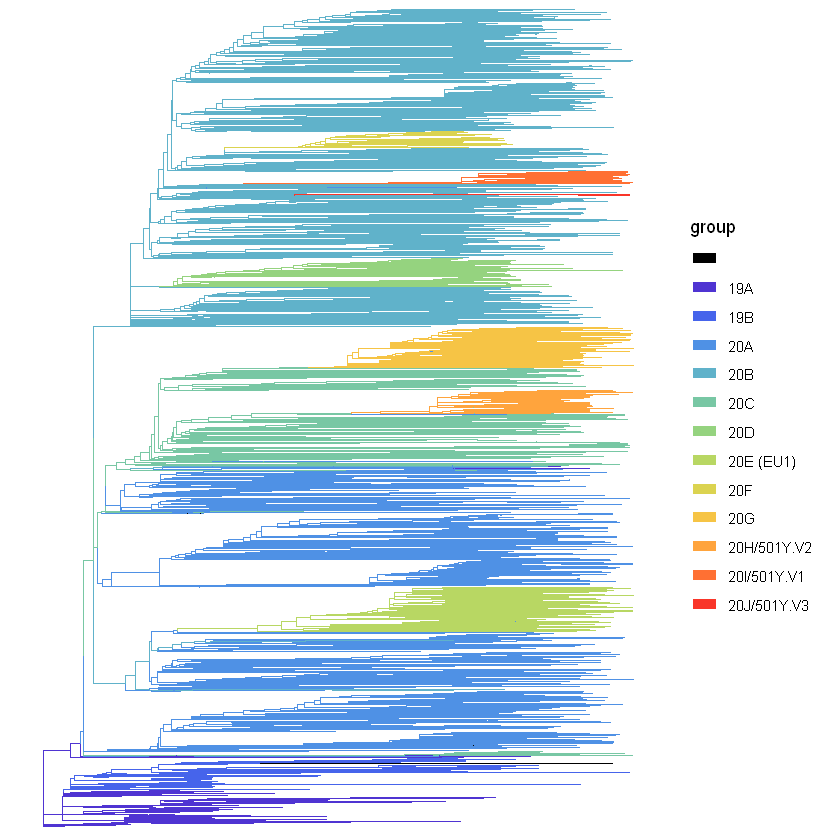

In [50]:
p

In [51]:
ggsave(filename = file.path(OUTPUT_DIR, "nextstrain_18_10.pdf"), plot = p, device = "pdf", width = 10, height = 18)